# creating dataframes

In [62]:
import pandas as pd

data = pd.DataFrame({
    'IDs': [1, 2, 3, 4, 5],
    'Names': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Ages': [24, 30, 20, 44, 35]
})

print(data)

   IDs    Names  Ages
0    1    Alice    24
1    2      Bob    30
2    3  Charlie    20
3    4    David    44
4    5      Eva    35


In [63]:
# DataFrame Overview
print("DataFrame Overview:")
print(data.info())
print("\nDataFrame Description:")
print(data.describe())

DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IDs     5 non-null      int64 
 1   Names   5 non-null      object
 2   Ages    5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
None

DataFrame Description:
            IDs       Ages
count  5.000000   5.000000
mean   3.000000  30.600000
std    1.581139   9.423375
min    1.000000  20.000000
25%    2.000000  24.000000
50%    3.000000  30.000000
75%    4.000000  35.000000
max    5.000000  44.000000


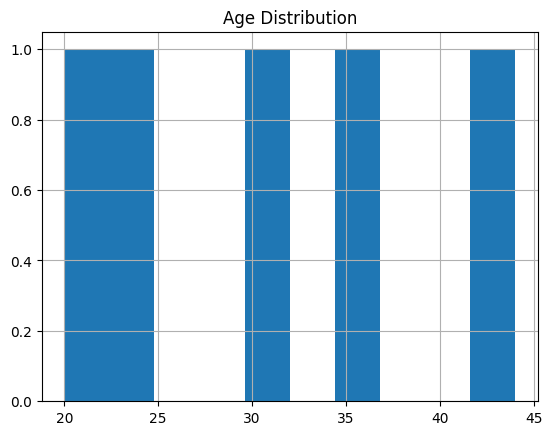

In [64]:
import matplotlib.pyplot as plt

data['Ages'].hist()
plt.title('Age Distribution')
plt.show()

In [9]:
data = data.set_index('IDs')
print(data)

       Names  Ages
IDs               
1      Alice    24
2        Bob    27
3    Charlie    22
4      David    32
5        Eva    29


# Reshaping the data

In [21]:
# Melt Example
data = pd.DataFrame(
    {
        'Names': ['Alice', 'Bob', 'Charlie'],
        'Cairo': [1, 0, 1],
        'Alex': [0, 1, 0]
    }
)

data_melted = pd.melt(data, id_vars=['Names'], var_name='City', value_name='Visited')
print(data_melted)

     Names   City  Visited
0    Alice  Cairo        1
1      Bob  Cairo        0
2  Charlie  Cairo        1
3    Alice   Alex        0
4      Bob   Alex        1
5  Charlie   Alex        0


In [30]:
data_melted[data_melted['City'] == 'Cairo']['Visited'].sum()

2

In [28]:
# Pivot
data_pivot = data_melted.pivot(index='Names', columns='City', values='Visited')
data_pivot['Names'] = data_pivot.index
data_pivot = data_pivot.reset_index(drop=True)
print(data_pivot)


City  Alex  Cairo    Names
0        0      1    Alice
1        1      0      Bob
2        0      1  Charlie


In [29]:
data['Cairo'].sum()

2

In [39]:
data = pd.DataFrame({
    'IDs': [1, 2, 3, 4, 5],
    'Names': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Ages': [24, 27, 22, 32, 29]
})

# print(data)
# Concatenating DataFrames
data2 = pd.DataFrame({
    'IDs': [6, 7],
    'Names': ['Frank', 'Grace'],
    'Ages': [30, 28]
})

# Concatenate along rows
data = pd.concat([data, data2], ignore_index=True)
print(data)


   IDs    Names  Ages
0    1    Alice    24
1    2      Bob    27
2    3  Charlie    22
3    4    David    32
4    5      Eva    29
5    6    Frank    30
6    7    Grace    28


In [40]:
# Concatenate along columns
# data['City'] = ['Cairo', 'Alex', 'Cairo', 'Alex', 'Cairo', 'Alex', 'Cairo']
# print(data)

city_data = pd.DataFrame({
    'IDs': [1, 2, 3, 4, 5, 6, 7],
    'City': ['Cairo', 'Alex', 'Cairo', 'Alex', 'Cairo', 'Alex', 'Cairo']
})

data = pd.concat([data, city_data], axis=1)
print(data)

   IDs    Names  Ages  IDs   City
0    1    Alice    24    1  Cairo
1    2      Bob    27    2   Alex
2    3  Charlie    22    3  Cairo
3    4    David    32    4   Alex
4    5      Eva    29    5  Cairo
5    6    Frank    30    6   Alex
6    7    Grace    28    7  Cairo


In [ ]:
# sorting by column values
data = data.sort_values(by='Ages', ascending=False)
print(data)

   IDs    Names  Ages  IDs   City
3    4    David    32    4   Alex
5    6    Frank    30    6   Alex
4    5      Eva    29    5  Cairo
6    7    Grace    28    7  Cairo
1    2      Bob    27    2   Alex
0    1    Alice    24    1  Cairo
2    3  Charlie    22    3  Cairo


In [43]:
# renaming columns
data = data.rename(columns={'IDs': 'ID', 'Names': 'Name', 'Ages': 'Age', 'City': 'Location'})
print(data)


   ID     Name  Age  ID Location
3   4    David   32   4     Alex
5   6    Frank   30   6     Alex
4   5      Eva   29   5    Cairo
6   7    Grace   28   7    Cairo
1   2      Bob   27   2     Alex
0   1    Alice   24   1    Cairo
2   3  Charlie   22   3    Cairo


In [44]:
# Drop columns
data = data.drop(columns=['ID'])
print(data)


      Name  Age Location
3    David   32     Alex
5    Frank   30     Alex
4      Eva   29    Cairo
6    Grace   28    Cairo
1      Bob   27     Alex
0    Alice   24    Cairo
2  Charlie   22    Cairo


In [45]:
# Drop rows
data = data.drop(index=[0, 1])
print(data)


      Name  Age Location
3    David   32     Alex
5    Frank   30     Alex
4      Eva   29    Cairo
6    Grace   28    Cairo
2  Charlie   22    Cairo


# Selection from dataframe

In [46]:
data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6, 7],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace'],
    'Age': [24, 27, 22, 32, 29, 31, 28],
    'City': ['Cairo', 'Alex', 'Cairo', 'Alex', 'Cairo', 'Alex', 'Cairo']
})

print(data)

   ID     Name  Age   City
0   1    Alice   24  Cairo
1   2      Bob   27   Alex
2   3  Charlie   22  Cairo
3   4    David   32   Alex
4   5      Eva   29  Cairo
5   6    Frank   31   Alex
6   7    Grace   28  Cairo


In [47]:
data[data['Age']> 30]

,ID,Name,Age,City
3,4,David,32,Alex
5,6,Frank,31,Alex


In [48]:
# select certain rows
data.iloc[0:3]

,ID,Name,Age,City
0,1,Alice,24,Cairo
1,2,Bob,27,Alex
2,3,Charlie,22,Cairo


In [ ]:
# Select based on multiple conditions
data[(data['Age'] > 25) & (data['City'] == 'Alex')]

,ID,Name,Age,City
1,2,Bob,27,Alex
3,4,David,32,Alex
5,6,Frank,31,Alex


In [66]:
# Read CSV data
data = pd.read_csv('../data/netflix_movies (1).csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [68]:
data.sample(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4521,s4522,TV Show,Salt Fat Acid Heat,NaN,Samin Nosrat,NaN,"October 11, 2018",2018,TV-PG,1 Season,Docuseries,Chef and food writer Samin Nosrat travels the ...
3685,s3686,TV Show,Stranger Things,NaN,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...",United States,"July 4, 2019",2019,TV-14,3 Seasons,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","When a young boy vanishes, a small town uncove..."
6626,s6627,Movie,Don't Be Afraid of the Dark,Troy Nixey,"Katie Holmes, Guy Pearce, Bailee Madison, Jack...","United States, Australia, Mexico","November 2, 2019",2010,R,99 min,Horror Movies,Young Sally Hurst discovers she isn't alone in...
7863,s7864,Movie,Revenge of the Green Dragons,"Andrew Lau Wai-Keung, Andrew Loo","Ray Liotta, Justin Chon, Kevin Wu, Harry Shum ...","Hong Kong, United States","July 21, 2018",2014,R,95 min,"Action & Adventure, Dramas, Independent Movies","In gritty 1980s New York, two Chinese immigran..."
4146,s4147,Movie,Velvet Buzzsaw,Dan Gilroy,"Jake Gyllenhaal, Rene Russo, Zawe Ashton, Toni...",United States,"February 1, 2019",2019,R,113 min,"Dramas, Thrillers","A feared critic, an icy gallery owner and an a..."
7893,s7894,Movie,Roots,Shweta Basu Prasad,NaN,NaN,"November 1, 2017",2016,TV-PG,62 min,"Documentaries, International Movies, Music & M...",This documentary explores the rich heritage of...
624,s625,Movie,Prime Time,Jakub Piątek,"Bartosz Bielenia, Magdalena Popławska, Andrzej...",NaN,"June 30, 2021",2021,TV-MA,92 min,"Dramas, International Movies, Thrillers","On New Year’s Eve 1999, an armed man enters a ..."
4726,s4727,Movie,Highway,Imtiaz Ali,"Randeep Hooda, Alia Bhatt, Durgesh Kumar, Prad...",India,"August 2, 2018",2014,TV-14,127 min,"Action & Adventure, Dramas, International Movies",City girl Veera is kidnapped on the eve of her...
4425,s4426,Movie,Asees,Rana Ranbir,"Rana Ranbir, Neha Pawar, Kuljinder Sidhu, Rupi...",India,"November 1, 2018",2018,TV-14,123 min,"Dramas, International Movies, Music & Musicals",When a dispute breaks out between five sibling...
4921,s4922,Movie,Kodachrome,Mark Raso,"Ed Harris, Jason Sudeikis, Elizabeth Olsen","Canada, United States","April 20, 2018",2018,TV-MA,105 min,"Comedies, Dramas","A record company exec joins his estranged dad,..."


In [69]:
data.sample(frac=0.01)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2008,s2009,TV Show,Family Business,NaN,"Jonathan Cohen, Gérard Darmon, Julia Piaton, L...",France,"September 11, 2020",2020,TV-MA,2 Seasons,"International TV Shows, TV Comedies, TV Dramas",After learning France is about to legalize pot...
7131,s7132,TV Show,JingleKids,NaN,NaN,Russia,"April 1, 2019",2017,TV-Y7,1 Season,Kids' TV,"In a magical wonderland, merry children and th..."
6802,s6803,Movie,Freshman Year,Jude Okwudiafor Johnson,"Diallo Thompson, Natalia Dominguez, Benjamin A...",United States,"March 3, 2020",2019,TV-PG,104 min,"Dramas, Faith & Spirituality",A devout preacher's son leaves his protective ...
3913,s3914,Movie,Hazaaron Khwaishein Aisi,Sudhir Mishra,"Kay Kay Menon, Shiney Ahuja, Chitrangada Singh...","India, France","April 15, 2019",2003,TV-MA,111 min,"Dramas, International Movies, Romantic Movies","In a politically charged India of the 1970s, t..."
457,s458,Movie,Lift Like a Girl,Mayye Zayed,NaN,"Egypt, Denmark, Germany","July 15, 2021",2021,TV-PG,93 min,"Documentaries, International Movies, Sports Mo...","With the guidance of her relentless coach, a t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6119,s6120,Movie,All Light Will End,Chris Blake,"Ashley Pereira, Alexandra Harris, Ted Welch, S...",United States,"February 2, 2019",2018,TV-MA,84 min,"Horror Movies, Thrillers",A horror novelist with a traumatic past return...
7498,s7499,Movie,Monster High: Haunted,"Dan Fraga, William Lau",NaN,United States,"March 24, 2018",2015,TV-Y7,76 min,Children & Family Movies,Hearing that their old school is being haunted...
6468,s6469,Movie,Child's Play,Tom Holland,"Catherine Hicks, Alex Vincent, Brad Dourif, Ch...",United States,"December 31, 2019",1988,R,87 min,"Cult Movies, Horror Movies","When a rash of murders unfolds, 6-year-old And..."
8042,s8043,Movie,Small Soldiers,Joe Dante,"Kirsten Dunst, Gregory Smith, Jay Mohr, Phil H...",United States,"June 1, 2019",1998,PG-13,110 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","When the Commando Elite, a group of toy action..."


In [70]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [71]:
data.nlargest(5, 'release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [72]:
data.nsmallest(5, 'release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


In [73]:
# Select set of columns
data[['title', 'release_year', 'rating']]

,title,release_year,rating
0,Dick Johnson Is Dead,2020,PG-13
1,Blood & Water,2021,TV-MA
2,Ganglands,2021,TV-MA
3,Jailbirds New Orleans,2021,TV-MA
4,Kota Factory,2021,TV-MA
...,...,...,...
8802,Zodiac,2007,R
8803,Zombie Dumb,2018,TV-Y7
8804,Zombieland,2009,R
8805,Zoom,2006,PG


In [76]:
# select specific rows based on regex
data[data['title'].str.contains('^The', regex=True)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
35,s36,Movie,The Father Who Moves Mountains,Daniel Sandu,"Adrian Titieni, Elena Purea, Judith State, Val...",NaN,"September 17, 2021",2021,TV-MA,110 min,"Dramas, International Movies, Thrillers",When his son goes missing during a snowy hike ...
36,s37,Movie,The Stronghold,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",NaN,"September 17, 2021",2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies","Tired of the small-time grind, three Marseille..."
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",NaN,"September 16, 2021",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Five glamorous millennials strive for success ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8569,s8570,Movie,The Young Vagabond,Sze Yu Lau,"Chia-Hui Liu, Wong Yu, Jason Pai Piao, Lung We...",Hong Kong,"August 16, 2018",1985,TV-14,85 min,"Action & Adventure, Comedies, International Mo...","To avenge his master, a wine-loving young man ..."
8570,s8571,Movie,Theater of Life,Peter Svatek,Massimo Bottura,Canada,"July 18, 2017",2016,TV-PG,94 min,Documentaries,This documentary follows chef Massimo Bottura ...
8571,s8572,Movie,Theeram,Saheed Arafath,"Pranav Ratheesh, Maria Yohannan, Askar Ameer, ...",India,"July 1, 2018",2017,TV-14,104 min,"Dramas, International Movies, Romantic Movies",An auto rickshaw driver harbors a deep affecti...
8572,s8573,Movie,"Thelonious Monk: Straight, No Chaser",Charlotte Zwerin,"Thelonious Monk, Samuel E. Wright",United States,"November 1, 2019",1988,PG-13,89 min,"Documentaries, Music & Musicals",The spotlight shines on iconic jazz pianist an...


In [78]:
# Use query to filter data
data.query('release_year > 2020')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
1551,s1552,TV Show,Hilda,NaN,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States","December 14, 2020",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
1696,s1697,TV Show,Polly Pocket,NaN,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland","November 15, 2020",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
2920,s2921,TV Show,Love Is Blind,NaN,"Nick Lachey, Vanessa Lachey",United States,"February 13, 2020",2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...


In [82]:
data.query('release_year > 2020 & rating == "PG-13"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
88,s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",NaN,"September 9, 2021",2021,PG-13,96 min,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Mal..."
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,"September 3, 2021",2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ..."
117,s118,Movie,Final Account,Luke Holland,NaN,"United Kingdom, United States","September 2, 2021",2021,PG-13,94 min,Documentaries,This documentary stitches together never-befor...
283,s284,Movie,Misha and the Wolves,Sam Hobkinson,NaN,"Belgium, United Kingdom","August 11, 2021",2021,PG-13,90 min,"Documentaries, International Movies","As a little girl, she escaped the Holocaust an..."
295,s296,Movie,The Paper Tigers,Quoc Bao Tran,"Alain Uy, Ron Yuan, Mykel Shannon Jenkins, Jae...",United States,"August 7, 2021",2021,PG-13,111 min,"Action & Adventure, Comedies","After reuniting as middle-aged men, three kung..."
317,s318,Movie,Pray Away,Kristine Stolakis,NaN,United States,"August 3, 2021",2021,PG-13,102 min,"Documentaries, LGBTQ Movies","Ex-leaders and a survivor of the so-called ""co..."
560,s561,Movie,Audible,Matt Ogens,NaN,NaN,"July 1, 2021",2021,PG-13,39 min,"Documentaries, Sports Movies","Shaken by a friend's suicide, a Deaf high scho..."
636,s637,Movie,The Ice Road,Jonathan Hensleigh,"Liam Neeson, Benjamin Walker, Amber Midthunder...","United States, Canada","June 25, 2021",2021,PG-13,109 min,Action & Adventure,"To save a team of miners trapped underground, ..."
685,s686,Movie,Fatherhood,Paul Weitz,"Kevin Hart, Alfre Woodard, Lil Rel Howery, DeW...",United States,"June 18, 2021",2021,PG-13,111 min,Dramas,"A widowed new dad copes with doubts, fears, he..."
